In [1]:
import cppyy
import cppyy.gbl as cpp
from cppyy.gbl import std

from keras.datasets import mnist

import numpy as np
import matplotlib.pyplot as plt

2023-02-14 19:56:23.809398: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-14 19:56:24.302241: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-14 19:56:24.302254: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-14 19:56:25.519930: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-02-1

In [2]:
cppyy.include('src/value.hpp')
cppyy.include('src/module.hpp')
cppyy.include('src/utils.hpp')

True

In [20]:
(raw_train_X, raw_train_y), (raw_test_X, raw_test_y) = mnist.load_data()
train_X = std.vector[std.vector[float]]()
train_y = std.vector[std.vector[float]]()
test_X = std.vector[std.vector[float]]()
test_y = std.vector[std.vector[float]]()

[train_X.push_back(std.vector[float](list(x.flatten()))) for x in raw_train_X]
[train_y.push_back(std.vector[float](list(np.eye(10)[y]))) for y in raw_train_y]
[test_X.push_back(std.vector[float](list(x.flatten()))) for x in raw_test_X]
[test_y.push_back(std.vector[float](list(np.eye(10)[y]))) for y in raw_test_y]

SystemError: <built-in method __init__ of vector<float> object at 0x7f6beaa6f900> returned a result with an exception set

6


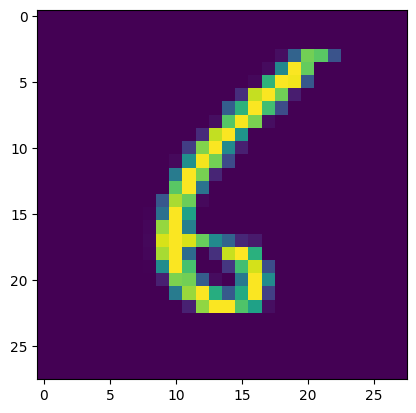

In [12]:
test_ind = np.random.randint(0, len(train_X))
plt.imshow(train_X[test_ind])
print(train_y[test_ind])

In [17]:
mnist_model = cpp.MLP[float]([784, 16, 16, 10])
BATCH = 32
EPOCHS = 1
LOSSES = []
running_loss = 0

for i in range(EPOCHS):
    for j in range(0, len(train_X), BATCH):
        for k in range(BATCH):
            X = std.vector[float](train_X[j+k].flatten())
            Y = [0 for _ in range(10)]
            Y[train_y[j+k]] = 1
            loss = mnist_model.loss(X, Y)
            loss.backward()
            running_loss += loss.get_data()
        mnist_model.descend_grad()
        mnist_model.zero_grad()
        print(f"Epoch: {i}, Batch: {j}, Loss: {running_loss/BATCH}")
        LOSSES.append(running_loss/BATCH)

TypeError: none of the 2 overloaded methods succeeded. Full details:
  Value<float> MLP<float>::loss(const std::vector<float>& input, const std::vector<float>& target) =>
    TypeError: could not convert argument 1
  Value<float> MLP<float>::loss(const std::vector<Value<float> >& input, const std::vector<float>& target) =>
    TypeError: could not convert argument 1